#**STROKE PREDICTION ANALYSIS**

# **ABSTRACT**

### **STROKE PREDICTION ANALYSIS**


The World Health Organization (WHO) identifies stroke as the second most prevalent cause of mortality on a global scale, accounting for roughly 11% of all fatalities. This dataset predicts the probability of an individual suffering a stroke based on **input parameters such as gender, age, various medical conditions, and smoking status**. Each row in the dataset contains relevant information pertaining to a specific patient.

## **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from google.colab import drive
import cv2
import os

## **READING THE DATASET**

In [ ]:
url = "https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/healthcare-dataset-stroke-data.csv"
df_data = pd.read_csv(url)
df_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **SUMMARY OF DATAFRAME STRUCTURE**

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


---

***Q. What are the datatypes?***

From the above result, the data types are as follows:

***Numerical: 7***

1. id
2. age
3. hypertension
4. heart_disease
5. avg_glucose_level
6. bmi
7. stroke

***Categorical: 5***

1. gender
2. ever_married
3. work_type
4. Residence_type
5. smoking_status

---



## **SUMMARY OF STATISTICAL INFORMATION**

In [ ]:
df_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


***Do the ranges of the predictor variables make sense?***

The ranges make sense for each attribute that influence the risks of getting stroke


## **DATA CLEANSING**

### **1. HANDLING MISSING VALUES**

Missing values of each feature is checked and are replaced with mean if it is numerical variable else mode if it is categorical variable

In [ ]:
missing_values = df_data.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

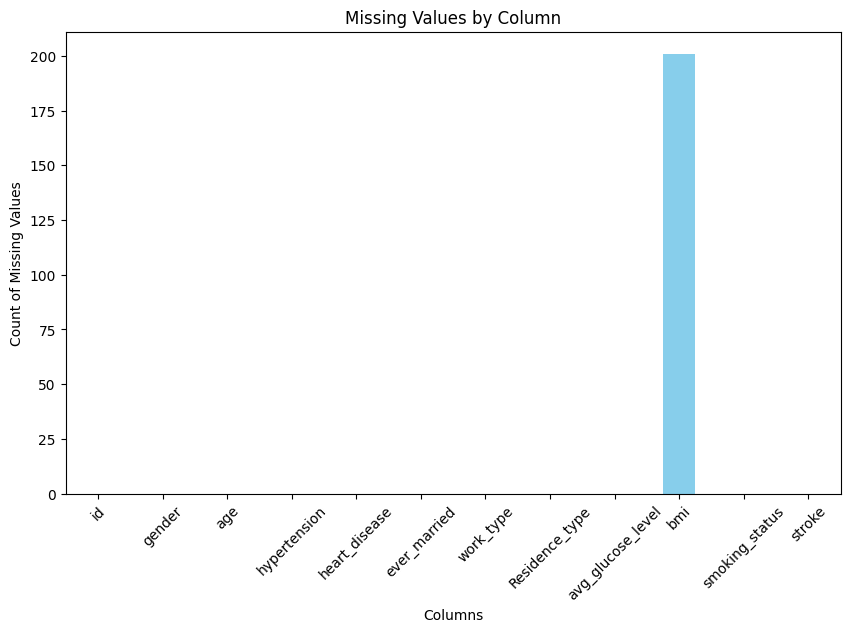

In [ ]:
# Visualizing missing values

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.show()


---

***Q. Are there missing values?***

***Q.What independent variable has missing value? How much?***

  *From* the above only **feature - bmi has missing values - 201**

  It is replaced with **mean** as its a numerical feature

---



In [ ]:
# replacing bmi missing values with mean
bmi_mean = df_data['bmi'].mean()
df_data['bmi'].fillna(bmi_mean, inplace=True)

In [ ]:
# Check if missing values are imputed
bmi_imputation = df_data['bmi'].isnull().sum()
bmi_imputation

0

In [ ]:
# Check for all variable imputation
missing_values = df_data.isnull().sum()
missing_values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

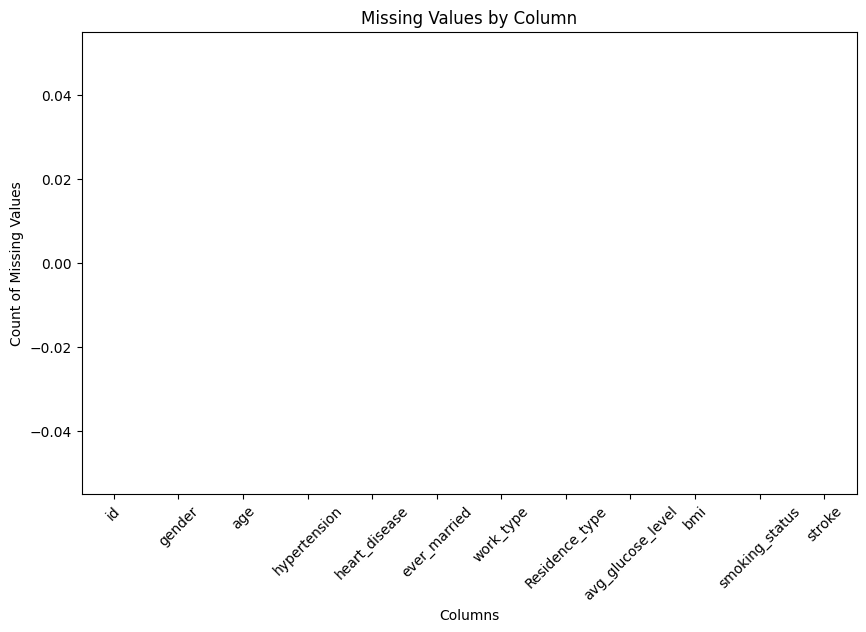

In [ ]:
# Viz missing values after imputation
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.show()

After imputation, we don't have any missing values

### **2. HANDLING DUPLICATES**

Check for duplicates and remove if any are present

In [ ]:
df_data.duplicated().sum()

0

No duplicates in the dataset

### **3. HANDLING IMBALANCED DATASET**

Check if the dataset has imbalances and handling them appropriately, since imbalanced dataset can lead to biased models


In [ ]:
# Check imbalance on the target variable - stroke
df_data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

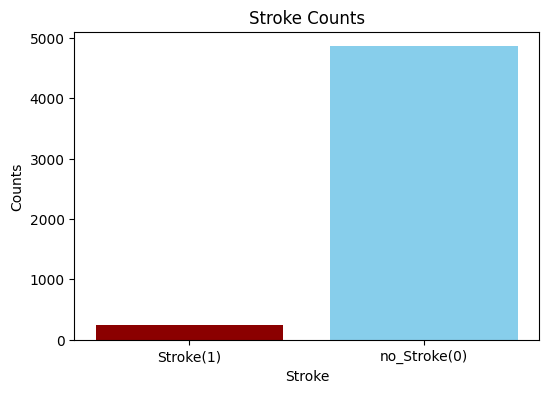

In [ ]:
# Graphical Viz of dataset imbalance


stroke_counts = df_data['stroke'].value_counts()

plt.figure(figsize=(6,4))
plt.bar([1,0], stroke_counts,color=['skyblue', 'darkred'])
plt.xticks([1,0], ["no_Stroke(0)", "Stroke(1)"])
plt.xlabel('Stroke')
plt.ylabel('Counts')
plt.title('Stroke Counts')

plt.show()



The dataset is highly imbalanced and category **stroke needs to be upsampled** to adress the imbalance.

Upsampling is performed via **random** **upsampling** technique where syntetic datapoints are generated for the minority class tobalance the data

In [ ]:
# Dataframe for stroke
stroke_1 = df_data[df_data.stroke == 1]
stroke_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1


In [ ]:
# Dataframe for no_stroke
stroke_0 = df_data[df_data.stroke == 0]
stroke_0

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.000000,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# Random Upsampling of minority class
stroke_1_upsampled = resample(stroke_1, replace=True, n_samples=(len(stroke_0) - len(stroke_1)))
stroke_1_upsampled

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
232,68356,Female,73.0,0,0,Yes,Self-employed,Urban,70.94,34.4,never smoked,1
45,19824,Male,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1
110,56546,Male,79.0,0,1,Yes,Private,Rural,129.98,22.6,formerly smoked,1
125,50522,Female,72.0,0,0,Yes,Govt_job,Urban,131.41,28.4,never smoked,1
194,23410,Female,72.0,0,0,Yes,Private,Rural,97.92,26.9,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
121,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
151,46703,Male,68.0,0,1,Yes,Private,Urban,223.83,31.9,formerly smoked,1


In [ ]:
# Merging upsampled stroke with original stroke for balacing the dataset
stroke_1 = pd.concat([stroke_1, stroke_1_upsampled])
stroke_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
121,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.300000,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.200000,never smoked,1
151,46703,Male,68.0,0,1,Yes,Private,Urban,223.83,31.900000,formerly smoked,1


In [ ]:
#Merging no_stroke and upsampled stroke to original dataframe
df_data = pd.concat([stroke_0, stroke_1], ignore_index=True)
df_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
9718,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
9719,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
9720,46703,Male,68.0,0,1,Yes,Private,Urban,223.83,31.9,formerly smoked,1


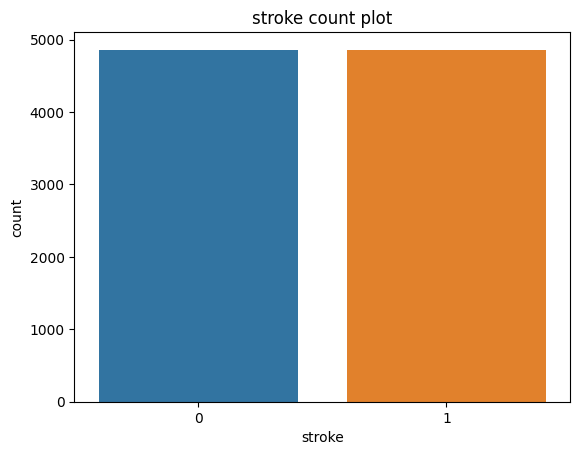

In [ ]:
# Checking Data Imbalance after upsampling

sns.countplot(data=df_data, x='stroke')
plt.title('stroke count plot')
plt.show()

After upsampling, we have balanced dataset of both the classes.

## **DATA DISTRIBUTION - NUMERICAL FEATURES**

Check data distribution for **numerical features including age, avg_glucode_level, bmi using Histogram**

***Q. What are the likely distributions of the numeric variables?***

***Q. What are the distribution of predictor variables?***

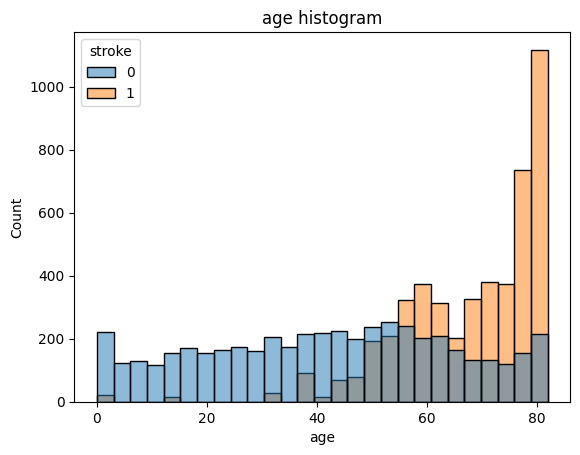

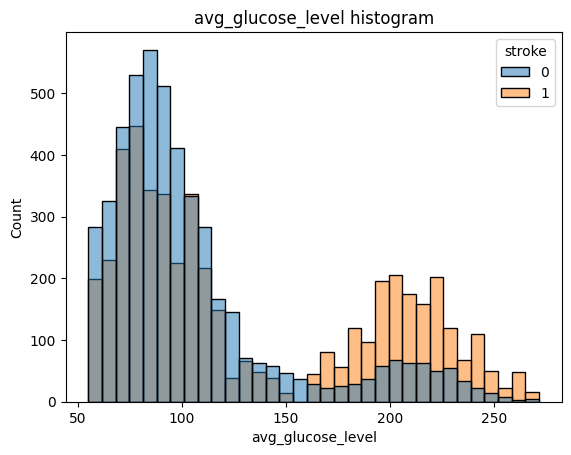

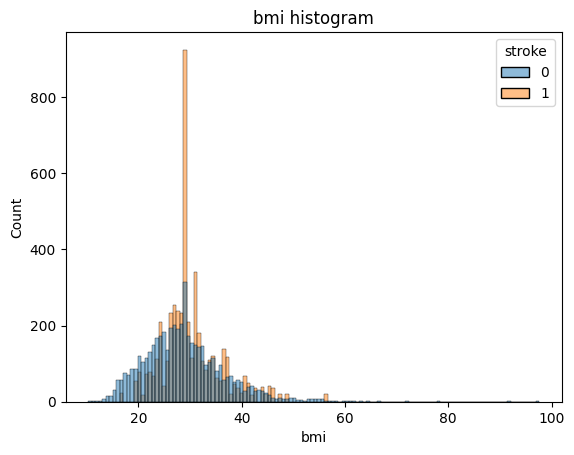

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
#numerical_features = ['avg_glucose_level', 'bmi']
for feature in numerical_features:
    sns.histplot(data=df_data, x=feature, hue='stroke')
    plt.title(feature+' histogram')
    plt.show()

### CONCLUSION ON NUMERICAL DATA DISTRIBUTION


*   AGE - Elderly people have high chance of suffering from stroke than younger ones. The distribution is Left Skewed
*   Avg_glucose_level - The distribution is Right Skewed
*   BMI - Onset of stroke is likely in the BMI range of 20 to 40. Almost normally distributed with a bit of right-skeweness

### **CHECKING DATA SKEWNESS**

Check for outliers, since data is skewed (not normally distributed)

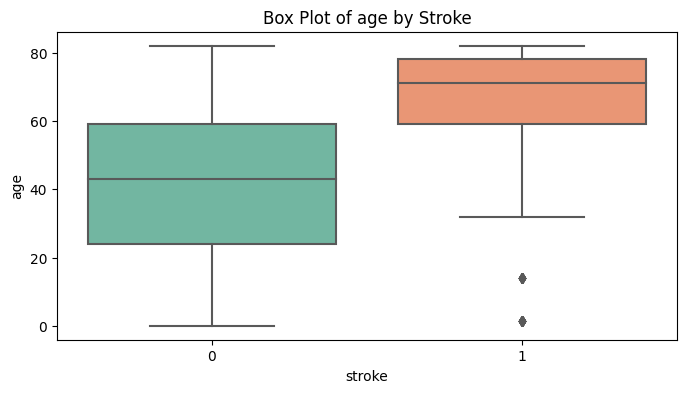

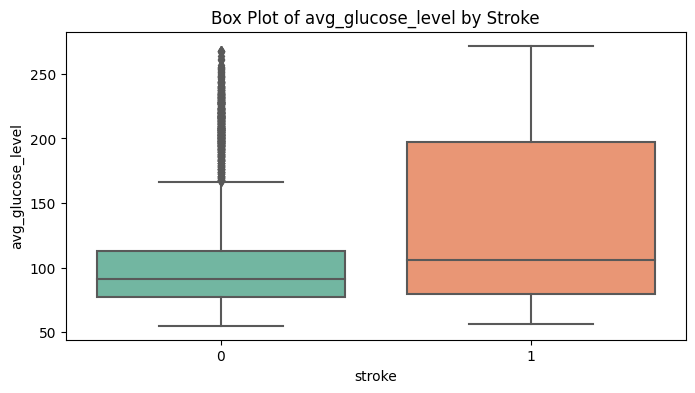

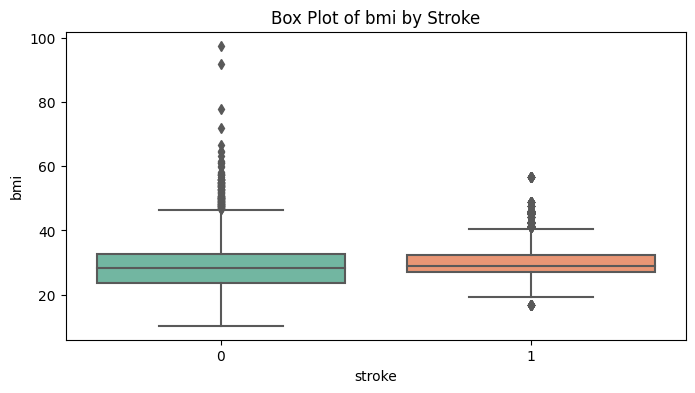

In [ ]:
#numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_data, y=feature, x='stroke', palette='Set2')
    plt.title(f'Box Plot of {feature} by Stroke')
    plt.show()

**Inference from the Box-plots**

*   AGE - Elderly people have high chance of suffering from stroke than younger ones
*   BMI - Onset of stroke is likely in the BMI range of 20 to 40
*   avg_glucose_level - There are many outliers in both categories, but people who had a stroke tend to have a higher average glucose level.


### **DATA TRANSFORMATION - Removing Outliers**

Transforming data will reduce the impact of outilers observed from the box plot.

Box cox transformation is applied as it optimally selects the power parameter lambda to best normalize the data since our numerical columns are both right skewed and comb.

In [ ]:
from scipy import stats

In [ ]:
# Apply the Box-Cox transformation to the columns
'''for column in numerical_features:
    if column in df_data.columns:
        transformed_data, lambda_value = stats.boxcox(df_data[column])
        df_data[column] = transformed_data

# Visualize the transformed distributions
f, ax = plt.subplots(1, 3, figsize=(18, 5))

for idx, t in enumerate(numerical_features):
    sns.histplot(data=df_data, x=t, hue='stroke', kde=True, ax=ax[idx])
    sns.rugplot(data=df_data, x=t, ax=ax[idx])
    ax[idx].set_title(f"Transformed {t}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()'''

'for column in numerical_features:\n    if column in df_data.columns:\n        transformed_data, lambda_value = stats.boxcox(df_data[column])\n        df_data[column] = transformed_data\n\n# Visualize the transformed distributions\nf, ax = plt.subplots(1, 3, figsize=(18, 5))\n\nfor idx, t in enumerate(numerical_features):\n    sns.histplot(data=df_data, x=t, hue=\'stroke\', kde=True, ax=ax[idx])\n    sns.rugplot(data=df_data, x=t, ax=ax[idx])\n    ax[idx].set_title(f"Transformed {t}")\n\nplt.subplots_adjust(wspace=0.3, hspace=0.5)\nplt.show()'

## **CATEGORICAL FEATURES**

'hypertension', 'heart_disease',smoking_status'

In [ ]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','hypertension','heart_disease','smoking_status']

### **LABEL ENCODING OF CATEGORICAL FEATURES**

In [ ]:
df_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns to encode
categorical_cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder on categorical columns
for col in categorical_cols_to_encode:
    df_data[col] = label_encoder.fit_transform(df_data[col])

# Display the first few rows of the dataframe to verify the encoding
df_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,2,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,1,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0,0


### **CORELATION MATRIX AFTER LABEL ENCODING**

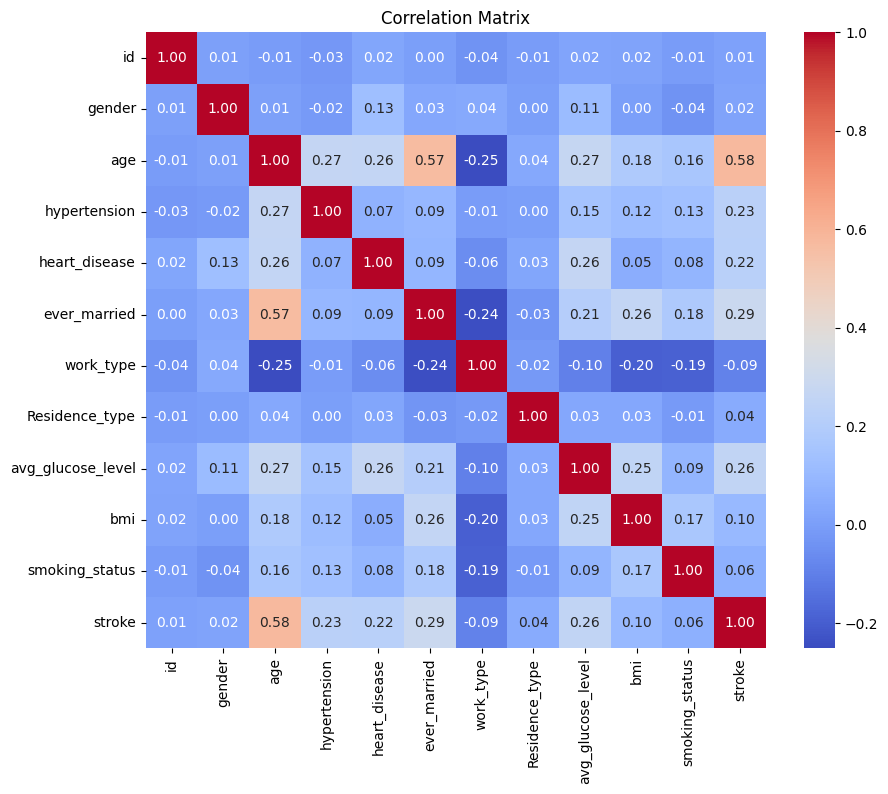

In [ ]:
# Assuming df_data is your DataFrame containing the numerical columns
correlation_matrix = df_data.corr()

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


***Q. Is the predictor variables independent of all the other predictor variables?***

    From the above correlation matrix result, we can infer that, the predictor variables independent of all the other predictor variables

In [ ]:
#saving clenased data

df_data.to_csv('clean_data.csv', index = False)

## **DATA PREPROCESSING FOR MODELLING**

### **1.DROPPING UNNECESSARY COLUMN**

In [ ]:
df_data = df_data.drop(['id'], axis=1)

### **2.DROPPING TARGET VARIABLE (STROKE)**

In [ ]:
X = df_data.drop(['stroke'], axis=1)
y = df_data['stroke']

In [ ]:
feature_names = list(X.columns)
feature_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

### **3. CREATING DATAFRAME WITHOUT TARGET VARIABLE**

In [ ]:
X = pd.DataFrame(X, columns=feature_names)

### **4. SPLITTING DATA TO TRAIN AND TEST IN THE RATIO OF 8:2**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### **5. TRAINING THE MODEL WITH RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(preds)

[0 1 0 ... 1 0 1]


### 6. EVALUATING CLASSIFICATION MODEL USING CONFUSION MATRIX

<Figure size 600x600 with 0 Axes>

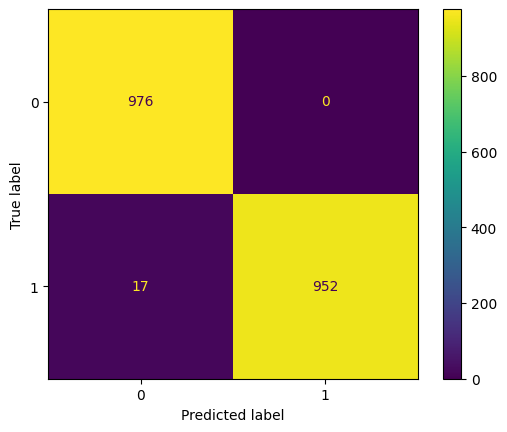

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(6, 6))
conf = confusion_matrix(preds, y_test, labels=model.classes_)
ConfusionMatrixDisplay(conf, display_labels=model.classes_).plot()
plt.show()

### 7. IDENTIFYING IMPORTATNT FEATURES IN DRIVING THE TARGET VARIABLE

                   Importances
age                     0.3896
avg_glucose_level       0.2070
bmi                     0.1840
smoking_status          0.0543
work_type               0.0462
hypertension            0.0298
ever_married            0.0278
gender                  0.0229
Residence_type          0.0212
heart_disease           0.0170


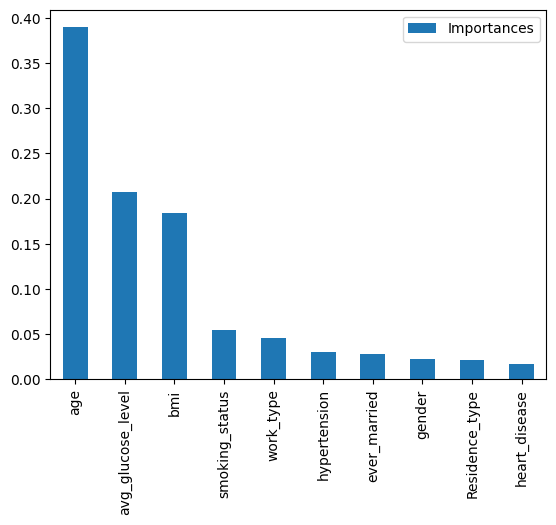

In [ ]:
feature_importance = pd.DataFrame(np.round(model.feature_importances_, 4),
                     index=feature_names,
                     columns=['Importances']).sort_values(by='Importances', ascending=False)
print(feature_importance)
feature_importance.plot.bar()
plt.show()

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=ed4b335d4f1186e42d4ca25ba1b8e9a29bd867dbf7303dd21521e8cd123b5471
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Understanding the important features

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.3337 ± 0.0068,age
0.2736 ± 0.0134,avg_glucose_level
0.2301 ± 0.0123,bmi
0.1096 ± 0.0101,smoking_status
0.0659 ± 0.0045,hypertension
0.0648 ± 0.0056,heart_disease
0.0523 ± 0.0051,work_type
0.0420 ± 0.0041,ever_married
0.0240 ± 0.0044,gender
0.0133 ± 0.0036,Residence_type


### **TRAINING THE MODEL USING LOGISTIC REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


accuracy_logistic, precision_logistic, recall_logistic, f1_logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7753213367609254, 0.7674650698602794, 0.7903391572456321, 0.77873417721519)

In [ ]:
feature_importance = logistic_model.coef_[0]


# Calculate the absolute values of coefficients
absolute_feature_importance = np.abs(feature_importance)

# Sort feature indices by importance (in descending order)
sorted_feature_indices = np.argsort(absolute_feature_importance)[::-1]

feature_names = list(X.columns)

# Sort the feature names accordingly
sorted_feature_names = [feature_names[i] for i in sorted_feature_indices]


for i, feature_name in enumerate(sorted_feature_names):
    importance_score = feature_importance[sorted_feature_indices[i]]
    print(f'Feature {i + 1}: {feature_name}, Importance: {importance_score:.5f}')



Feature 1: heart_disease, Importance: 0.73010
Feature 2: hypertension, Importance: 0.43209
Feature 3: gender, Importance: -0.14434
Feature 4: age, Importance: 0.07042
Feature 5: smoking_status, Importance: -0.06380
Feature 6: Residence_type, Importance: 0.02720
Feature 7: work_type, Importance: 0.01393
Feature 8: ever_married, Importance: -0.01124
Feature 9: bmi, Importance: 0.00837
Feature 10: avg_glucose_level, Importance: 0.00407


According to the above analysis,

***Q. Which independent variables are useful to predict target?***

1. Age
2. avg_glucose_level
3. bmi
4. hypertension
5. smoking_status

***Q. Which predictor variables are most important?***

From the above analysis we can conclude that the below features are consistently important for stroke prediction (target)

1. avg_glucose_level
2. bmi
3. Age



### **Train Test Data Split**

***Q. Do the traning and test sets have same data?***

In [ ]:
common_data_points = set(X_train) & set(X_test)
if len(common_data_points) == 0:
    print("Training and test sets have no common data points.")
else:
    print("Training and test sets have common data points.")

Training and test sets have common data points.


##**WITH OUTLIERS**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)

In [ ]:
bmi_imputation = df['bmi'].isnull().sum()
bmi_imputation

0

In [ ]:
missing_values = df.isnull().sum()
missing_values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
stroke_1 = df[df.stroke == 1]
stroke_0 = df[df.stroke == 0]


stroke_1_upsampled_new = resample(stroke_1, replace=True, n_samples=(len(stroke_0) - len(stroke_1)))
stroke_1 = pd.concat([stroke_1, stroke_1_upsampled_new])


df = pd.concat([stroke_0, stroke_1], ignore_index=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.000000,Unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,31720,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.000000,formerly smoked,1
9718,54695,Male,74.0,0,0,Yes,Private,Urban,167.13,28.893237,Unknown,1
9719,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.400000,smokes,1
9720,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1


In [ ]:
label_encoder = LabelEncoder()

# Select categorical columns to encode
categorical_cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder on categorical columns
for col in categorical_cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataframe to verify the encoding
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,2,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,1,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0,0


In [ ]:
df = df.drop(['id'], axis=1)

In [ ]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

feature_names = list(X.columns)

X = pd.DataFrame(X, columns=feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(preds)

[0 1 0 ... 1 0 1]


<Figure size 600x600 with 0 Axes>

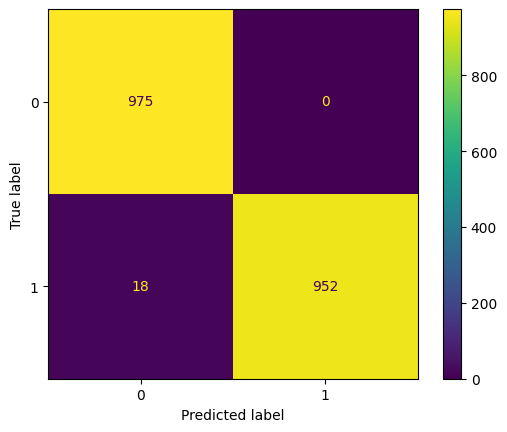

In [ ]:
plt.figure(figsize=(6, 6))
conf = confusion_matrix(preds, y_test, labels=model.classes_)
ConfusionMatrixDisplay(conf, display_labels=model.classes_).plot()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


accuracy_logistic, precision_logistic, recall_logistic, f1_logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7712082262210797, 0.7688391038696538, 0.775950668036999, 0.772378516624041)

From the above result we can infer that the **Outliers does not have significant impact**

***Q. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.***

In [ ]:
df_data_imputation = df_data

df_data_imputation['1_percent'] = df_data_imputation[['stroke']]
df_data_imputation['5_percent'] = df_data_imputation[['stroke']]
df_data_imputation['10_percent'] = df_data_imputation[['stroke']]
df_data_imputation.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,1_percent,5_percent,10_percent
0,1,3.0,0,0,0,4,0,95.12,18.0,0,0,0,0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,2,0,0,0,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0,0,0,0,0
3,0,70.0,0,0,1,2,0,69.04,35.9,1,0,0,0,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0,0,0,0,0


In [ ]:
def get_missing_percentage(df):

  missing_percent = df.isnull().sum() * 100 / len(df)
  missing_value_df_data = pd.DataFrame({'column_name' : df.columns, 'missing_percent': missing_percent})

  return missing_value_df_data

In [ ]:
print(get_missing_percentage(df_data_imputation))

                         column_name  missing_percent
gender                        gender              0.0
age                              age              0.0
hypertension            hypertension              0.0
heart_disease          heart_disease              0.0
ever_married            ever_married              0.0
work_type                  work_type              0.0
Residence_type        Residence_type              0.0
avg_glucose_level  avg_glucose_level              0.0
bmi                              bmi              0.0
smoking_status        smoking_status              0.0
stroke                        stroke              0.0
1_percent                  1_percent              0.0
5_percent                  5_percent              0.0
10_percent                10_percent              0.0


In [ ]:
def create_missing(df, percentage, col):
    df.loc[df.sample(frac = percentage).index, col] = np.nan

In [ ]:
create_missing(df_data_imputation, 0.01, '1_percent')
create_missing(df_data_imputation, 0.05, '5_percent')
create_missing(df_data_imputation, 0.1, '10_percent')

In [ ]:
print(get_missing_percentage(df_data_imputation))

                         column_name  missing_percent
gender                        gender         0.000000
age                              age         0.000000
hypertension            hypertension         0.000000
heart_disease          heart_disease         0.000000
ever_married            ever_married         0.000000
work_type                  work_type         0.000000
Residence_type        Residence_type         0.000000
avg_glucose_level  avg_glucose_level         0.000000
bmi                              bmi         0.000000
smoking_status        smoking_status         0.000000
stroke                        stroke         0.000000
1_percent                  1_percent         0.997737
5_percent                  5_percent         4.998971
10_percent                10_percent         9.997943


In [ ]:
# Storing the Index of NaN values in each of the coloumns
index_1 = list(np.where(df_data_imputation['1_percent'].isna())[0])
index_5 = list(np.where(df_data_imputation['5_percent'].isna())[0])
index_10 = list(np.where(df_data_imputation['10_percent'].isna())[0])

In [ ]:
print(f"Length of index_1 is {len(index_1)} and it contains {(len(index_1)/len(df_data_imputation['1_percent']))*100} % of total data in column || Total rows: {len(df_data_imputation['1_percent'])}")
print(f"Length of index_5 is {len(index_5)} and it contains {(len(index_5)/len(df_data_imputation['5_percent']))*100} % of total data in column || Total rows: {len(df_data_imputation['5_percent'])}")
print(f"Length of index_10 is {len(index_10)} and it contains {(len(index_10)/len(df_data_imputation['10_percent']))*100} % of total data in column || Total rows: {len(df_data_imputation['10_percent'])}")

Length of index_1 is 97 and it contains 0.9977370911335116 % of total data in column || Total rows: 9722
Length of index_5 is 486 and it contains 4.998971405060687 % of total data in column || Total rows: 9722
Length of index_10 is 972 and it contains 9.997942810121375 % of total data in column || Total rows: 9722


***1. Mean based Imputation***

In [ ]:
df_data_imputation_mean = df_data_imputation[['1_percent','5_percent','10_percent']]

In [ ]:
from sklearn.impute import SimpleImputer
mean_impute = SimpleImputer(strategy='mean') #replacing 'mean' with 'median' for median imputation
mean_impute.fit(df_data_imputation_mean)
imputed_train_df_data = mean_impute.transform(df_data_imputation_mean)

In [ ]:
imputed_mean = pd.DataFrame(mean_impute.fit_transform(df_data_imputation_mean), columns = df_data_imputation_mean.columns)
print(get_missing_percentage(imputed_mean))

           column_name  missing_percent
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
stroke = df_data["stroke"]
merged_mean = pd.concat([stroke,imputed_mean])
merged_mean.mean()

0             0.500000
1_percent     0.499948
5_percent     0.499459
10_percent    0.500686
dtype: float64

In [ ]:
merged_mean.var()

0             0.250026
1_percent     0.247531
5_percent     0.237527
10_percent    0.225028
dtype: float64

**The Mean-based method shows a very negotiable variablilty.**


***2. K -  Nearest Neighbor [KNN] Imputation technique***

In [ ]:
#Creating a new Dataframe to perform the KNN imputation

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_data_imputation_KNN = df_data_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=10)
df_data_imputed_n = pd.DataFrame(imputer.fit_transform(df_data_imputation_KNN), columns = df_data_imputation_KNN.columns)

In [ ]:
df_data_imputed_n.head()
print(get_missing_percentage(df_data_imputed_n))

           column_name  missing_percent
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
stroke = df_data["stroke"]
imputed_mean = pd.concat([stroke,df_data_imputed_n])
imputed_mean.columns = ["stroke","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

stroke        0.250026
1_Percent     0.250026
5_Percent     0.250026
10_Percent    0.250026
dtype: float64

**The KNN method shows very negotiable variablilty.**


***3. Imputation Using Multivariate Imputation by Chained Equation (MICE)***

In [ ]:
#Creating a new Dataframe to perform the MICE imputation
df_data_imputation_MICE = df_data_imputation[['1_percent','5_percent','10_percent']]
print(get_missing_percentage(df_data_imputation_MICE))

           column_name  missing_percent
1_percent    1_percent         0.997737
5_percent    5_percent         4.998971
10_percent  10_percent         9.997943


In [ ]:
pip install impyute #installing impyute module

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training = mice(df_data_imputation_MICE.values)

In [ ]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [ ]:
print(get_missing_percentage(imputed_training))

           column_name  missing_percent
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
stroke = df_data["stroke"]

In [ ]:
merged_mice = pd.concat([stroke,imputed_training])
merged_mice.columns = ["stroke","1_Percent","5_Percent","10_Percent"]
merged_mice.mean()

stroke        0.500000
1_Percent     0.499995
5_Percent     0.499999
10_Percent    0.499995
dtype: float64

In [ ]:
merged_mice.var()

stroke        0.250026
1_Percent     0.250013
5_Percent     0.250043
10_Percent    0.250015
dtype: float64

**The MICE method shows very negotiable variablilty.**

# **AutoML**

Automated Machine Learning (AutoML) is the process of automating tasks in the machine learning pipeline such as data preprocessing, hyperparameter tuning, model selection and evaluation

Initializing H2O

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=b857ad560a81ad6c4bbc2962c5067efafe6ff444bd7f45a411079c757c5d1223
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

import random, sys

from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV




In [ ]:
#assigning memory size, run_time for h20 initialization

min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
#initiazling the H2O cluster

port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:51729..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmgvx_zvm
  JVM stdout: /tmp/tmpmgvx_zvm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmgvx_zvm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:51729
Connecting to H2O server at http://127.0.0.1:51729 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_7ynjsp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


##Importing data into H2O dataframe

In [ ]:
#importing cleansed dataframe into google drive
#from google.colab import drive
#drive.mount('/content/drive')

# df_data is the cleansed dataframe
#df_data.to_csv('/content/drive/My Drive/Colab Notebooks/healthcare-dataset-stroke-data_preprocessed.csv', index=False)


In [ ]:
#reading the h2o dataframe
h2o_url = "https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/clean_dataset.csv"
#h2o_url = "https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/healthcare-dataset-stroke-data_cleansed.csv"
h2o_df = h2o.import_file(path = h2o_url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_df.head()

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,82,0,1,0,2,1,215.6,24.9,2,0
1,82,0,0,0,3,0,106.43,27,3,0
1,82,0,0,1,3,0,56.75,21,2,0
1,82,0,0,1,2,1,105.77,29.5,0,0
1,82,0,1,1,3,0,72.93,27.1,1,0
1,82,0,0,1,3,0,85.29,27,2,0
0,82,0,0,0,3,1,82.21,26,2,0
0,82,0,0,1,2,0,96.63,26.5,0,0
0,82,1,0,1,2,1,62.46,20.3,1,0
1,82,1,0,1,2,0,227.28,33.3,2,0


In [ ]:
h2o_df.describe()

Rows:9722
Cols:11

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
type,int,real,int,int,int,int,int,real,real,int,int
mins,0.0,0.08,0.0,0.0,0.0,0.0,0.0,55.12,10.3,0.0,0.0
mean,0.41915243777000616,54.8058424192553,0.1745525612013989,0.11952273194815881,0.7638346019337585,2.092676404032092,0.523040526640609,118.41692038675168,29.52488580566756,1.4445587327710343,0.5
maxs,2.0,82.0,1.0,1.0,1.0,4.0,1.0,271.74,97.6,3.0,1.0
sigma,0.4936541876231239,22.234761544465986,0.37960345955705815,0.32441928771096357,0.42474681833925854,1.016351175003849,0.49949454155244327,55.212571488428395,6.861285111781237,1.0331715182729904,0.500025716857417
zeros,5648,0,8025,8560,2296,1287,4637,0,0,2393,4861
missing,0,0,0,0,0,0,0,0,0,0,0
0,0.0,82.0,0.0,1.0,0.0,2.0,1.0,215.6,24.9,2.0,0.0
1,1.0,82.0,0.0,0.0,0.0,3.0,0.0,106.43,27.0,3.0,0.0
2,1.0,82.0,0.0,0.0,1.0,3.0,0.0,56.75,21.0,2.0,0.0


In [ ]:
#Dropping the 1_percent, 5_percent and 10_percent coulmns
#h2o_df = h2o_df.drop(['1_percent', '5_percent','10_percent'])
#h2o_df


In [ ]:
h2o_df.shape

(9722, 11)

###***Train and test Split***

In [ ]:
pct_rows=0.80
df_train, df_test = h2o_df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(7713, 11)
(2009, 11)


In [ ]:
#print(df_train)
#print(df_test)
#h2o_df['stroke'] == 0

In [ ]:
X=h2o_df.columns
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
#Dropping target variable
y_target = 'stroke'
X.remove(y_target)


In [ ]:
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


####***Identifing predictor significance - using OLS***


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
import pandas as pd

# Assuming 'h2o_df' is your H2OFrame
# Convert the H2OFrame to a pandas DataFrame
df = h2o_df.as_data_frame()

# Perform OLS regression on the pandas DataFrame
model = sm.OLS(df['stroke'], df[['gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 stroke   R-squared (uncentered):                   0.674
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              2005.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        03:43:58   Log-Likelihood:                         -4981.0
No. Observations:                9722   AIC:                                      9982.
Df Residuals:                    9712   BIC:                                  1.005e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -0.0203      0.008     -2.421      0.015      -0.037      -0.004
age                   0.0119      0.000     51.486      0.000       0.011       0.012
hypertension          0.1026      0.011      9.067      0.000       0.080       0.125
heart_disease         0.0982      0.014      7.264      0.000       0.072       0.125
ever_married         -0.0579      0.012     -4.766      0.000      -0.082      -0.034
work_type            -0.0043      0.004     -1.219      0.223      -0.011       0.003
Residence_type        0.0015      0.008      0.185      0.854      -0.014       0.017
avg_glucose_level     0.0007   8.04e-05      8.800      0.000       0.001       0.001
bmi                  -0.0055      0.000    -11.380      0.000      -0.006      -0.005
smoking_status       -0.0232      0.004     -5.666      0.000      -0.031      -0.015
==============================================================================
Omnibus:                      493.915   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.189
Skew:                          -0.227   Prob(JB):                     1.42e-56
Kurtosis:                       2.345   Cond. No.                         486.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value for all feature other than gender (0.07) are all less than 0.05.
The accuracy is 68.0%
Perform OLS again by dropping the Gender feature and check if the accuracy is increasing.



In [ ]:
# Perform OLS regression on the pandas DataFrame
#after removing the Gender feature
model = sm.OLS(df['stroke'], df[['age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 stroke   R-squared (uncentered):                   0.674
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              2227.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        03:43:58   Log-Likelihood:                         -4984.0
No. Observations:                9722   AIC:                                      9986.
Df Residuals:                    9713   BIC:                                  1.005e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0119      0.000     51.472      0.000       0.011       0.012
hypertension          0.1035      0.011      9.150      0.000       0.081       0.126
heart_disease         0.0948      0.013      7.046      0.000       0.068       0.121
ever_married         -0.0590      0.012     -4.856      0.000      -0.083      -0.035
work_type            -0.0054      0.003     -1.566      0.117      -0.012       0.001
Residence_type        0.0012      0.008      0.147      0.883      -0.015       0.017
avg_glucose_level     0.0007   8.01e-05      8.603      0.000       0.001       0.001
bmi                  -0.0056      0.000    -11.617      0.000      -0.007      -0.005
smoking_status       -0.0228      0.004     -5.584      0.000      -0.031      -0.015
==============================================================================
Omnibus:                      483.628   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.916
Skew:                          -0.222   Prob(JB):                     1.98e-55
Kurtosis:                       2.348   Cond. No.                         481.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


P-values for all the variables are less than 0.05 and the accuracy is 68.0%. It is unaffected even after removing 'Gender' tells us that the variable was not important for stroke prediction.i.e, there is no need to drop any of the feature from the dataset.

###**VIF - Variance Inflation Factor (multicollinearity)**

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = h2o_df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]


#Compute VIF
multic_df = Multic.as_data_frame()

vif = pd.DataFrame()
vif["variables"] = multic_df.columns
vif["VIF"] = [variance_inflation_factor(multic_df.values, i) for i in range(multic_df.shape[1])]
vif

,variables,VIF
0,gender,1.747952
1,age,11.126611
2,hypertension,1.329497
3,heart_disease,1.301406
4,ever_married,6.720014
5,work_type,3.965043
6,Residence_type,2.067376
7,avg_glucose_level,6.575685
8,bmi,12.966458
9,smoking_status,3.144769


###**Inference:**
  
  
  
  From VIF results it is clear that "avg_glucose_level" and "bmi" have very high multicollinearity with other variables in the model.

  The other variables generally have lower VIF values, indicating lower levels of multicollinearity.

  But since these 2 features have more importance as per the feature selection performed before, cannot be removed from the dataset.


#**H2O AutoML Execution**

Configuring AutoML traning parameters

In [ ]:
aml = H2OAutoML(max_models=25,max_runtime_secs=run_time, balance_classes=True, seed =1)

In [ ]:
#pass the data through the H2OAutoML

aml.train(training_frame=df_train, x=X, y=y_target)

AutoML progress: |
03:43:59.677: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████████████
03:45:01.391: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:45:04.648: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████████████████████
03:46:17.170: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20231212_34359


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          262192                 19           20           19.98         378           438           412.92

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.013328648183174868
RMSE: 0.11544976476015388
MAE: 0.04140381751277452
RMSLE: 0.09567757155803423
Mean Residual Deviance: 0.013328648183174868

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.01473011417429131
RMSE: 0.12136768175379849
MAE: 0.046891231840954783
RMSLE: 0.10122306795607294
Mean Residual Deviance: 0.01473011417429131

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0468913  0.00230396  0.0473834     0.0479788     0.0446104     0.0445625     0.0499215
mean_residual_deviance  0.0147302  0.00133107  0.014291      0.015132      0.0137781     0.0135917     0.0168585
mse                     0.0147302  0.00133107  0.014291      0.015132      0.0137781     0.0135917     0.0168585
r2                      0.941072   0.00532237  0.942832      0.939465      0.944876      0.945626      0.932562
residual_deviance       0.0147302  0.00133107  0.014291      0.015132      0.0137781     0.0135917     0.0168585
rmse                    0.121272   0.00539818  0.119545      0.123012      0.11738       0.116583      0.12984
rmsle                   0.101161   0.00397574  0.100513      0.102465      0.0978362     0.0976743     0.107317

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-12 03:46:50  11.154 sec  0                  nan              nan             nan
    2023-12-12 03:46:51  11.331 sec  5                  0.167609         0.0415812       0.0280927
    2023-12-12 03:46:51  11.503 sec  10                 0.140639         0.0392213       0.0197794
    2023-12-12 03:46:51  11.673 sec  15                 0.130418         0.0398775       0.0170088
    2023-12-12 03:46:51  11.898 sec  20                 0.124569         0.0402784       0.0155175
    2023-12-12 03:46:51  12.036 sec  25                 0.12308          0.0406522       0.0151486
    2023-12-12 03:46:52  12.190 sec  30                 0.120558         0.0407996       0.0145343
    2023-12-12 03:46:52  12.373 sec  35                 0.117887         0.0406944       0.0138973
    2023-12-12 03:46:52  12.555 sec  40                 0.115951         0.0407028       0.0134445
    2023-12-12 03:46:52  12.704 sec  45                 0.115967         0.0411133       0.0134484
    2023-12-12 03:46:52  12.831 sec  50                 0.11545          0.0414038       0.0133286

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
age                26266.7                1                    0.405545
avg_glucose_level  11567.1                0.440372             0.17859
bmi                11141.1                0.424152             0.172012
smoking_status     3535.12                0.134585             0.0545804
ever_married       3332.02                0.126853             0.0514446
work_type          3066.3                 0.116737             0.04

# *Model Explanation*



1.   Model deployed using DRF algorithm
2.   Hyperparameters : number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth	max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
3.   Model accuracy is obtained as
4.   K fold Cross Validation (k =5) is implemented to prevent model overfiiting and model summary is obtained
5. Feature importance is provided using tree based inbuilt method

####Inference:

**Feature Importance:**


Most significant predictor variable: **age** with scaled importance **1.0**

Least significant predictor variable: **hypertension** with scaled importance **0.0813137.**




**Model Accuarcy**

CV does not improve the scoring metrics much in this case, the following metrics remain to be almost same

mse	0.0150834

rmse	0.1227003



In [ ]:
print(aml.leaderboard)

model_id                               rmse        mse        mae     rmsle    mean_residual_deviance
DRF_1_AutoML_1_20231212_34359      0.121368  0.0147301  0.0468912  0.101223                 0.0147301
XGBoost_1_AutoML_1_20231212_34359  0.139728  0.0195238  0.0656742  0.121                    0.0195238
XGBoost_2_AutoML_1_20231212_34359  0.140994  0.0198793  0.0620157  0.121335                 0.0198793
GBM_2_AutoML_1_20231212_34359      0.145614  0.0212034  0.0733194  0.122835                 0.0212034
GBM_1_AutoML_1_20231212_34359      0.182059  0.0331455  0.111623   0.146766                 0.0331455
GLM_1_AutoML_1_20231212_34359      0.400712  0.16057    0.32996    0.2818                   0.16057
[6 rows x 6 columns]



The values of the following metric are the lowest when compared to other model.
Hence DRF is selected:

rmse - 0.122887

mse - 0.0151012

mae -0.0473804

rmsle -0.102243

mean_residual_deviance - 0.0151012






In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20231212_34359


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          262192                 19           20           19.98         378           438           412.92

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.013328648183174868
RMSE: 0.11544976476015388
MAE: 0.04140381751277452
RMSLE: 0.09567757155803423
Mean Residual Deviance: 0.013328648183174868

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.01473011417429131
RMSE: 0.12136768175379849
MAE: 0.046891231840954783
RMSLE: 0.10122306795607294
Mean Residual Deviance: 0.01473

In [ ]:
best_model.algo

'drf'

##**Variable Importance**

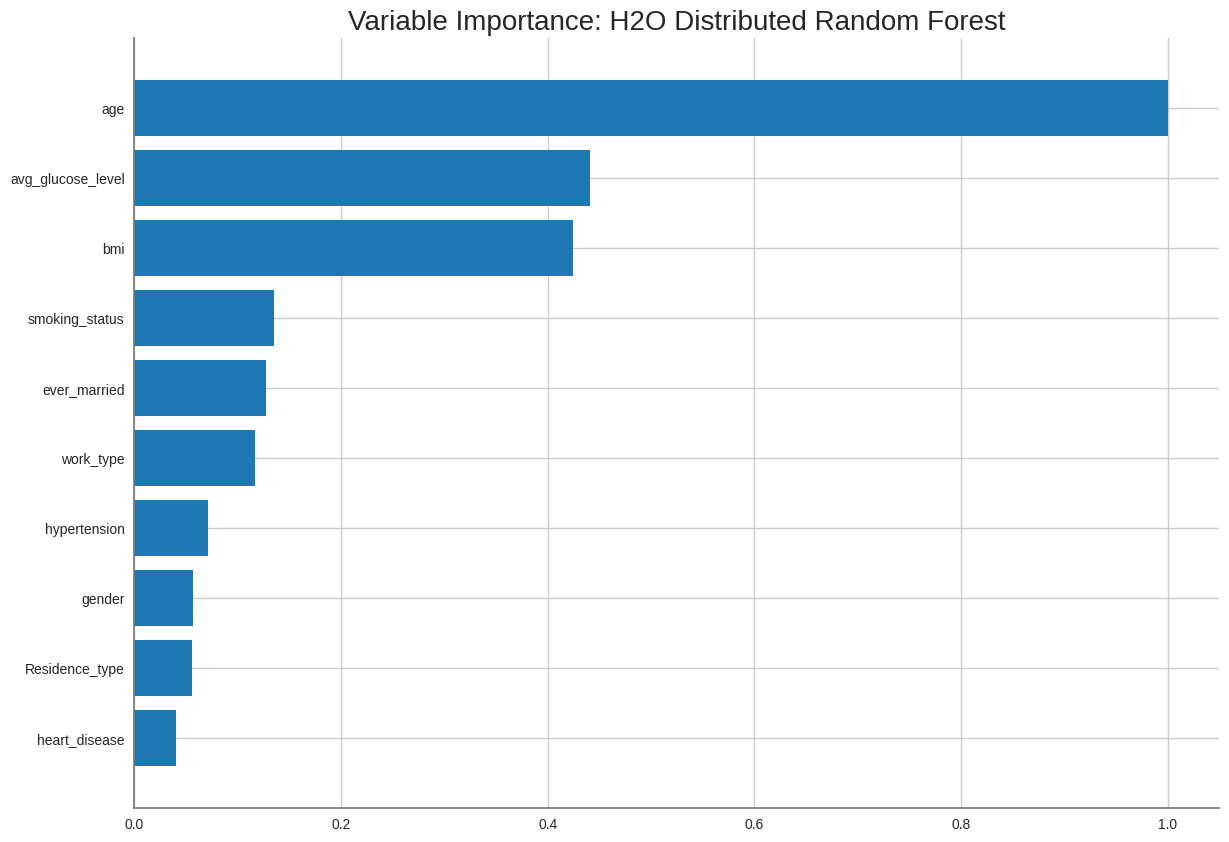

<Figure size 800x550 with 0 Axes>

In [ ]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

***The plot is viz of the feature imporatnce which has been provided as  metric in the above***


***'Age'***

**'avg_glucose_lvl' ***

***'bmi'***

#***Regularization***

Decision Forest (DRF), like many tree-based ensemble models, doesn't have L1 or L2 regularization options as in linear models.

However, there are alternative ways to control the complexity and prevent overfitting in DRF like tree pruning.

Here the following hyperparameters are tuned:
ntrees=100, max_depth=20, mtries=8




In [ ]:
from h2o.estimators import H2ORandomForestEstimator

rf = H2ORandomForestEstimator(ntrees=100, max_depth=20, mtries=8, nfolds=5)
rf.train(x=X, y=y_target, training_frame=df_train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1702352612568_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         441595                 18           20           19.93         319           375           346.6

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.013222826369764627
RMSE: 0.11499054904540906
MAE: 0.0389596102069202
RMSLE: 0.09486264670933596
Mean Residual Deviance: 0.013222826369764627

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.016156405665229693
RMSE: 0.12710785052556625
MAE: 0.045347796980430205
RMSLE: 0.1042466026586535
Mean Residual Deviance: 0.016156405665229693

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0453618  0.00286517  0.0478557     0.0415062     0.0444184     0.044489      0.0485398
mean_residual_deviance  0.0161631  0.001904    0.0177801     0.0134445     0.0152312     0.0162971     0.0180628
mse                     0.0161631  0.001904    0.0177801     0.0134445     0.0152312     0.0162971     0.0180628
r2                      0.935332   0.00761924  0.928845      0.94621       0.939073      0.934781      0.927748
residual_deviance       0.0161631  0.001904    0.0177801     0.0134445     0.0152312     0.0162971     0.0180628
rmse                    0.126953   0.00758822  0.133342      0.11595       0.123415      0.12766       0.134398
rmsle                   0.104143   0.00562168  0.108856      0.095613      0.102554      0.104173      0.10952

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae          training_deviance
---  -------------------  ----------  -----------------  -------------------  --------------------  --------------------
     2023-12-12 03:48:06  21.474 sec  0.0                nan                  nan                   nan
     2023-12-12 03:48:06  21.503 sec  1.0                0.19429175934477444  0.03774928774928775   0.03774928774928775
     2023-12-12 03:48:06  21.546 sec  2.0                0.19255466683201763  0.04015974367669025   0.03707729971878931
     2023-12-12 03:48:06  21.576 sec  3.0                0.17856643652998294  0.038836713169083166  0.03188597225501643
     2023-12-12 03:48:06  21.602 sec  4.0                0.17752176171733514  0.04106459100563513   0.03151397588322632
     2023-12-12 03:48:06  21.627 sec  5.0                0.17017573767609506  0.04042399329232522   0.02895978169360312
     2023-12-12 03:48:06  21.652 sec  6.0                0.16015697757176958  0.03889301008105928   0.025650257464924303
     2023-12-12 03:48:06  21.677 sec  7.0                0.1588352862288373   0.040074998376575216  0.025228648151396672
     2023-12-12 03:48:06  21.709 sec  8.0                0.15532166745988613  0.04009786351038672   0.02412482038251945
     2023-12-12 03:48:06  21.736 sec  9.0                0.14852613077469276  0.039056031732843985  0.022060011522901136
---  ---                  ---         ---                ---                  ---                   ---
     2023-12-12 03:48:09  24.127 sec  91.0               0.11495680971741105  0.03886187044928059   0.013215068100405052
     2023-12-12 03:48:09  24.155 sec  92.0               0.11492373243974191  0.038845025046882115  0.013207464277881388
     2023-12-12 03:48:09  24.183 sec  93.0               0.11494226373428734  0.03885538496308418   0.013211723992362468
     2

#**HYPERPARAMETER TUNING**

In [ ]:
hp_h2o_df = h2o_df

s = hp_h2o_df['stroke']

t = hp_h2o_df.drop(['stroke'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)


import numpy as np
from sklearn.model_selection import train_test_split

t_array = np.array(t.as_data_frame())  # Convert H2OFrame to NumPy array
s_array = np.array(s.as_data_frame())  # Convert H2OFrame to NumPy array

t_train, t_test, s_train, s_test = train_test_split(t_array, s_array, random_state=101, test_size=0.2)


Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 1100}


From the hyperparameter tuning result, we can infer that the below are the important hyperparameters with the respective values.

{'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 500}

#**MODEL INTERPRETABILITY**

With interpretability becoming an increasingly important requirement for machine learning projects, there's a growing need for the complex outputs of techniques such as SHAP to be communicated to non-technical stakeholders.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
import shap

##Implementing SHAP on Tree based Model - Random Forest

In [ ]:
shap_url = "https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/clean_dataset.csv"
shap_data = pd.read_csv(shap_url)
shap_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,82.0,0,1,0,2,1,215.60,24.9,2,0
1,1,82.0,0,0,0,3,0,106.43,27.0,3,0
2,1,82.0,0,0,1,3,0,56.75,21.0,2,0
3,1,82.0,0,0,1,2,1,105.77,29.5,0,0
4,1,82.0,0,1,1,3,0,72.93,27.1,1,0


In [ ]:
shap_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,82.0,0,1,0,2,1,215.60,24.9,2,0
1,1,82.0,0,0,0,3,0,106.43,27.0,3,0
2,1,82.0,0,0,1,3,0,56.75,21.0,2,0
3,1,82.0,0,0,1,2,1,105.77,29.5,0,0
4,1,82.0,0,1,1,3,0,72.93,27.1,1,0


In [ ]:
#Dropping the target variable
X_shap = shap_data.drop(['stroke'], axis=1)
y_shap = shap_data['stroke']

In [ ]:
feature_names_shap = list(X_shap.columns)
feature_names_shap

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:
print("Shape of X:", X_shap.shape)
print("Length of y:", len(y_shap))

Shape of X: (9722, 10)
Length of y: 9722


In [ ]:
#X_shap = pd.DataFrame(X_shap, columns=feature_names_shap)

In [ ]:
#training the model into Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_shap, y_shap, test_size=0.20, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train, y_train)


#preds = rfc_model.predict(X_test)
#print(preds)

RandomForestClassifier(random_state=0)

In [ ]:
model_rf = rfc_model.fit(X_train, y_train)

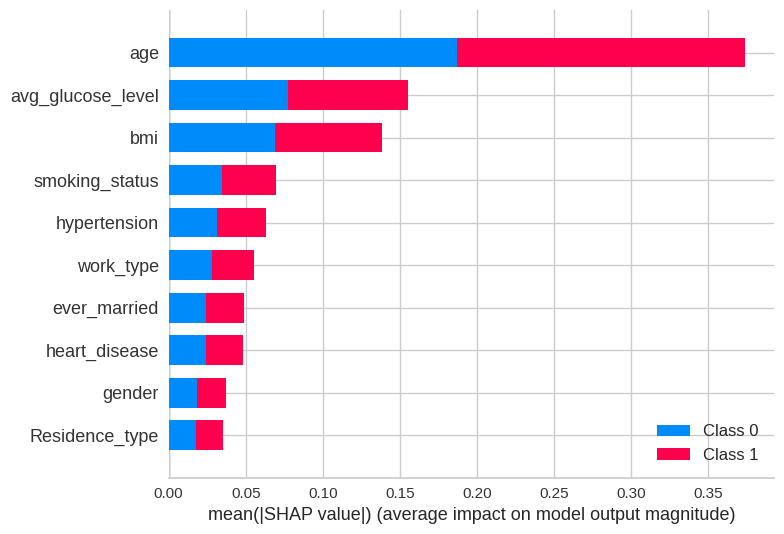

In [ ]:
import shap

# Create a SHAP explainer object using the trained Random Forest model
explainer = shap.TreeExplainer(rfc_model, feature_perturbation='tree_path_dependent')

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names_shap)

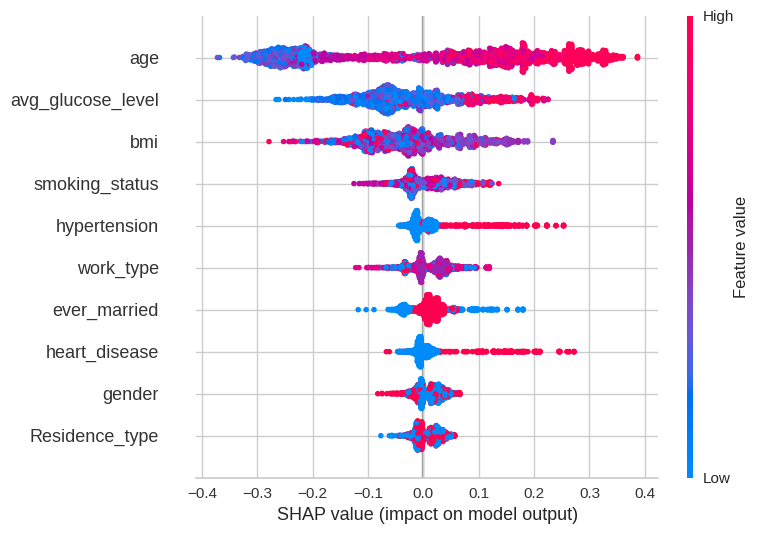

In [ ]:
shap.summary_plot(shap_values[1], X_test)

###***Inference for SHAP results on Random forest model:***


From the shap plot we can infer that the important features:

* ***age***
* ***avg_glucose_level***
* ***bmi***

From the ***summary plot***:

The total model output magnitude range: 0.00 - 0.35


From the ***beesworm plot*** we can see that the :


* People with higher value of "age" are prone to get stroke

* People with higher value of "avg_glucose_level" are most likely to get stroke

* we can also observe that People with higher value of "hypertension" are mostly affect by stroke.

* Mostly people with average value of "bmi" are affected by stroke than the on the people with higher values


##**Implementing ICE on Random forest Model**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
#PartialDependenceDisplay.from_estimator(model_rf, X_train, feature_names_shap)

Computing partial dependence plots and individual conditional expectation...


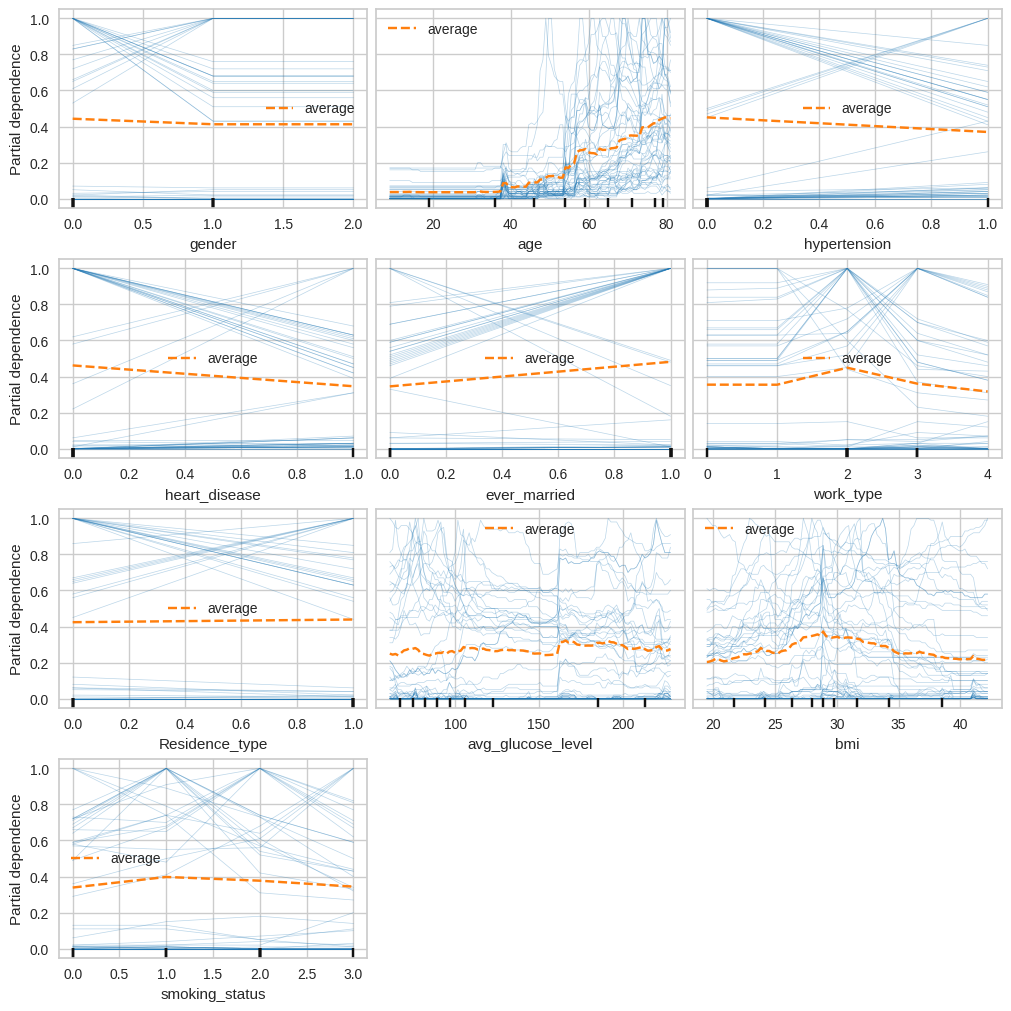

In [ ]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(figsize=(10, 10),constrained_layout=True)

common_params = {
    "subsample": 50,
    "random_state": 0,
}

features_info = {
    "features": feature_names_shap,
    "kind": "both",
    "centered": False,
}

display = PartialDependenceDisplay.from_estimator(
    model_rf,
    X_train,
    **features_info,
    ax=ax,
    **common_params
)

Computing partial dependence plots and individual conditional expectation...


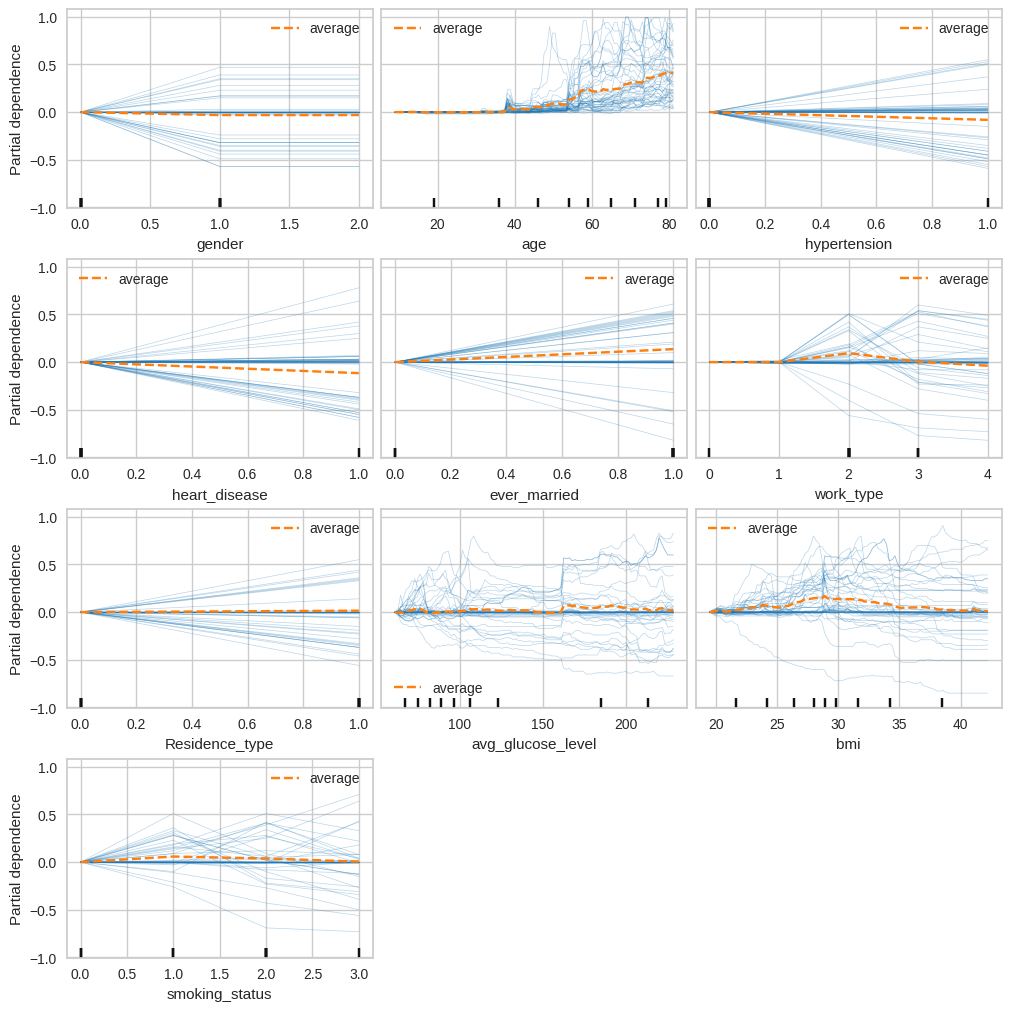

In [ ]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(figsize=(10, 10),constrained_layout=True)

common_params = {
    "subsample": 50,
    "random_state": 0,
}

features_info = {
    "features": feature_names_shap,
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    model_rf,
    X_train,
    **features_info,
    ax=ax,
    **common_params
)

##**Inference for the ICE plots on Random Forest Model**


From the above plot we can infer that the below feature are major predictors as the plots have distinctive fluctuations:

*   age
*   avg_glucose_level
*   bmi


***AGE:***

* We can observe that the pdp plot is increasing with the increase in age
* Also there is a spike at the value ***60***
* We can infere that people between the age of ***55 to 82*** tend to be affected by stroke mostly.

***avg_glucose_level:***

* We can observe that there is a splike in the pdp plot at the value of 160
* It is also clear that people with the avg_glucose_level value of ***160 - 200*** are affected by stroke.

***BMI:***

* It is clear from the plot that people with the bmi range of ***25 - 35*** are mostly affected by Stroke







---


###***Both the 2 implemented model interpretability methods -  SHAP and ICE infers that the most important features are:***


* ***age***
* ***avg_glucose_level***
* ***bmi***


---



##Implementing SHAP on Linear Model - Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shap, y_shap, train_size = 0.8, random_state = 20, stratify = y_shap)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

In [ ]:
# Train the model
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
model_lr = lr_model.fit(X_train, y_train)

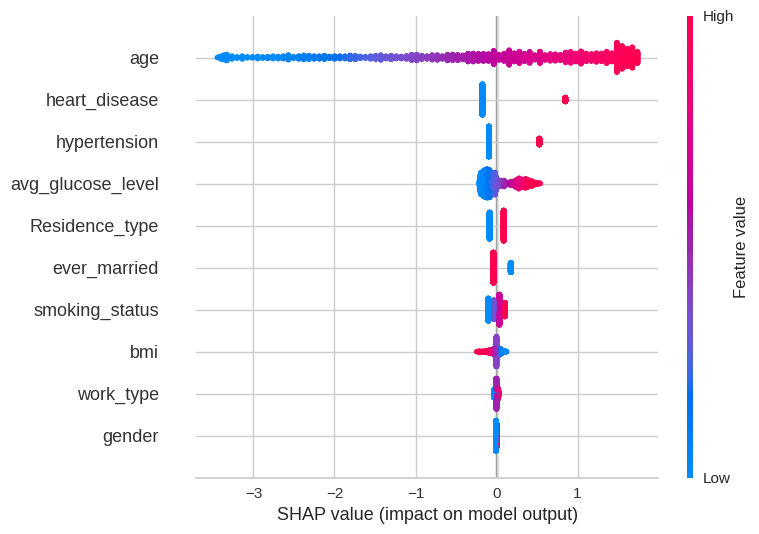

In [ ]:
# Create a SHAP explainer object using the trained Logistic Regression model
explainer_lr = shap.Explainer(lr_model, X_train)
# Calculate SHAP values for the test set
shap_values_lr = explainer_lr.shap_values(X_test)
# Plot SHAP summary plot
shap.summary_plot(shap_values_lr, X_test, feature_names=feature_names_shap)

In [ ]:
# Calculate SHAP values for the test set
shap_values_lr = explainer_lr.shap_values(X_test)

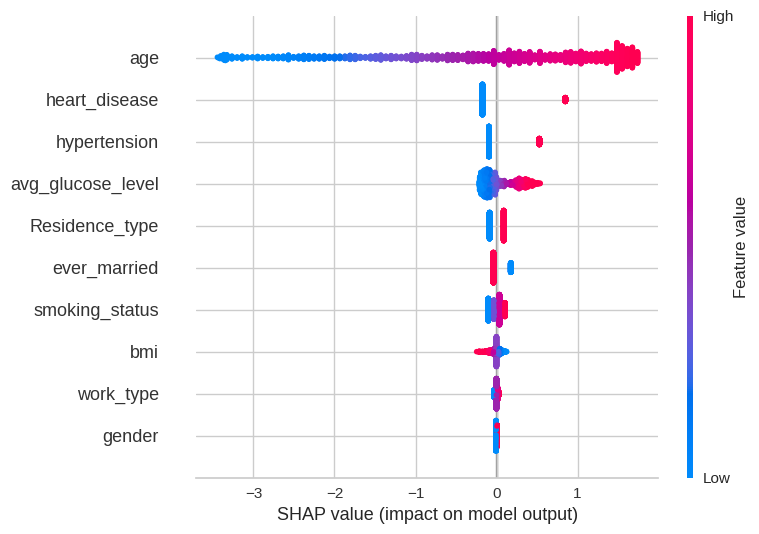

In [ ]:
# Plot SHAP summary plot
shap.summary_plot(shap_values_lr, X_test, feature_names=feature_names_shap)

###***Inference on SHAP results for Logistic Regression Model***


From the shap plot - beesworm plot, we can see that important feature are:

* ***age***
* ***hypertension***
* ***bmi***


* Mostly people with higher value of "age" have higher chances of getting affected by STROKE and the SHAP value is > 0


* People with higher value of "hypertension" are prone to be attacked by Stroke. The Shap values are grouped close at 0.5

* wheareas the people with lesser value of hypertension are not attacked by Stroke as the shap value is grouped close to -0.9.

* People wiht higher value of "avg_glucose_level" tend to get stroke as the shap values are positive.

* people with lower "BMI" values tend to be affected by stroke[as the shap values are positive] than the people with higher BMI values


##**Implementing ICE on Logistic Regression Model**

Computing partial dependence plots and individual conditional expectation...


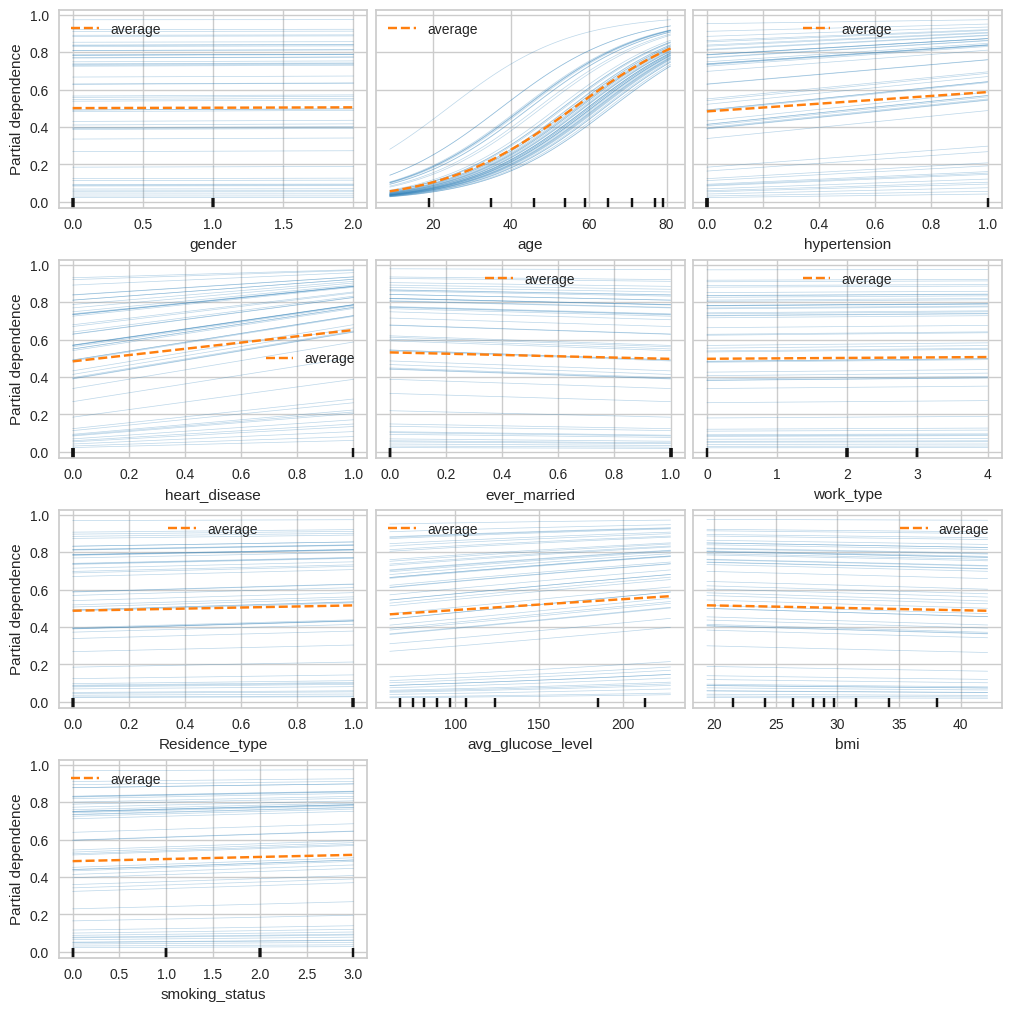

In [ ]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(figsize=(10, 10),constrained_layout=True)

common_params = {
    "subsample": 50,
    "random_state": 0,
}

features_info = {
    "features": feature_names_shap,
    "kind": "both",
    "centered": False,
}

display = PartialDependenceDisplay.from_estimator(
    model_lr,
    X_train,
    **features_info,
    ax=ax,
    **common_params
)

Computing partial dependence plots and individual conditional expectation...


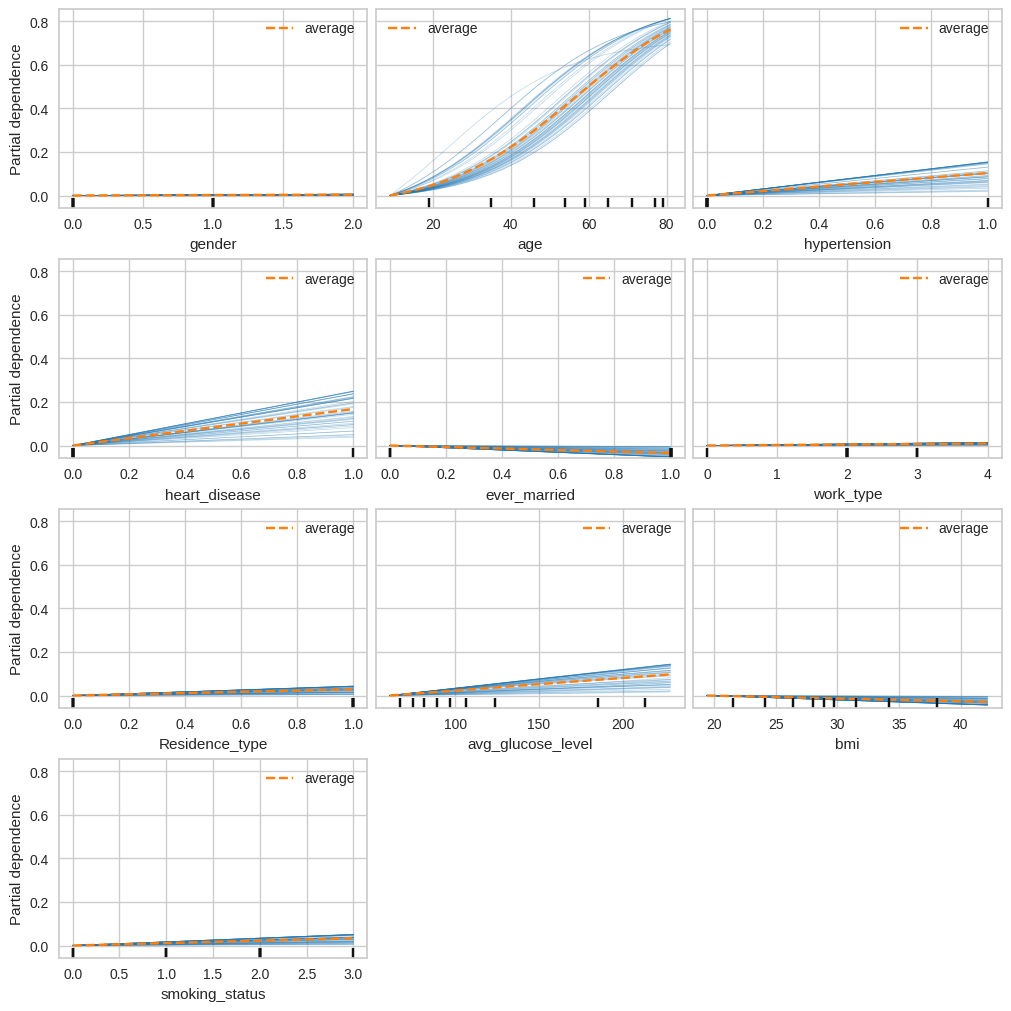

In [ ]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(figsize=(10, 10),constrained_layout=True)

common_params = {
    "subsample": 50,
    "random_state": 0,
}

features_info = {
    "features": feature_names_shap,
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    model_lr,
    X_train,
    **features_info,
    ax=ax,
    **common_params
)

##**Inference for the ICE plots on Random Forest Model**


From the above plot we can infer that the below feature are major predictors as the plots have distinctive fluctuations:

*   age
*   avg_glucose_level
*   bmi
* Hypertension


***AGE:***

* we can distinctively observe that the partial dependence drastically increase with the age

***avg_glucose_level:***

* It is evident from the above plot that people with the avg_glucose_level value > ***100*** are mostly affected by stroke.

***BMI:***

* It is clear from the plot that people with the bmi range of ***30 - 40** are mostly affected by Stroke

***Hypertension***
* we can infer that the people with the hypertension value 0.2 to 1 are mostly affected by Stroke




---


###***After implementing 2 different methods of model interpretability - SHAP and ICE:***

we can see that the below are the commonly most important features:


* ***age***
* ***hypertension***
* ***bmi***

where avg_glucose_level is considered as one of the important features by ICE plot.


---



##Implementing SHAP on best model from AutoML

In [ ]:
pip install shap


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa_4e5lqz
  JVM stdout: /tmp/tmpa_4e5lqz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpa_4e5lqz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_z40bdj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


  0%|          | 0/100 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

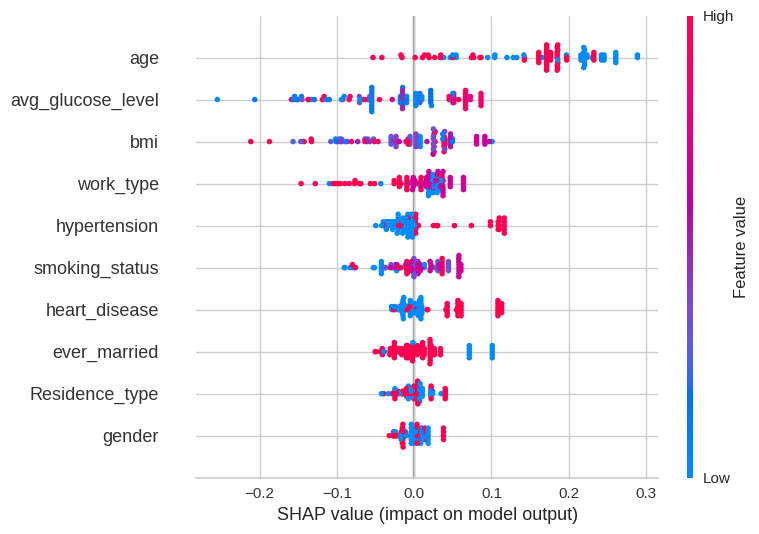

In [ ]:
import shap
import h2o
import pandas as pd
from h2o.estimators import H2ORandomForestEstimator


h2o.init()


data = h2o.import_file('https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/clean_dataset.csv')



# Defining features and target column names
X = data.columns[:-1]  # Features
y = data.columns[-1]   # Target column

# Split the data into train and test sets
train, test = data.split_frame(ratios=[0.7], seed=1234)

# Train an H2O Random Forest model
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, seed=1234)
model.train(x=X, y=y, training_frame=train)

# Convert test data to Pandas DataFrame
test_pd = test.as_data_frame()

# Filter test data columns to match the training set
test_filtered = test_pd[X]

# Convert filtered test data back to H2OFrame
test_h2o = h2o.H2OFrame(test_filtered)

# Ensuring columns are in the same order as the training data
test_h2o.columns = train[X].columns

# Define a function to get predictions from the H2O model
def predict_fn(data):
    h2o_data = h2o.H2OFrame(pd.DataFrame(data), column_names=test_h2o.columns)
    return model.predict(h2o_data).as_data_frame().values.flatten()

# Choose a smaller sample size for summarizing the background data
sampled_data = shap.sample(test_h2o.as_data_frame(), 100)

# Creating a SHAP explainer using KernelExplainer for black-box models with sampled data
explainer = shap.KernelExplainer(predict_fn, sampled_data)

# Calculating SHAP values using a subset of the test data
shap_values = explainer.shap_values(test_h2o.as_data_frame().iloc[:100])

# Visualize SHAP summary plot
shap.summary_plot(shap_values, test_h2o.as_data_frame().iloc[:100])


We already implemented AutoML and inferred that DRF is the best model.

Inference of SHAP results:


From the shap plot - beesworm plot, we can infere that the important features are:

* ***age***
* ***hypertension***
* ***bmi***
* ***avg_glucose_level***



We can conclude the following insights:

* Mostly people with higher value of "age" are affected by stroke than the people with lower age

* according the autoML-H2O RandomForest model shap analysis, mostly people with higher values of avg_glucose_level have more chances of getting stroke, eventhough there are few data points with lower value has positive shap values.

* People with lower and medium BMI value are less likely to be affected by stroke. However, we can observe that people with higher BMI values also fall behind the 0.0 shap value [i.e. have negative shap value].

* We can also observe that for the feature - hypertension, people having higher hypertension values tend to get stroke.

##**Implementing ICE for AutoML - best model [H2O Random forest model]**

In [ ]:
pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.9 MB/s eta 0:00:00


In [ ]:
pip install pycebox


  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3625 sha256=1c35265248be569bafb933ddc6787a4e9d4a0a648f088f4cb988e3bc600db01b
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 17 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_z40bdj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.888 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

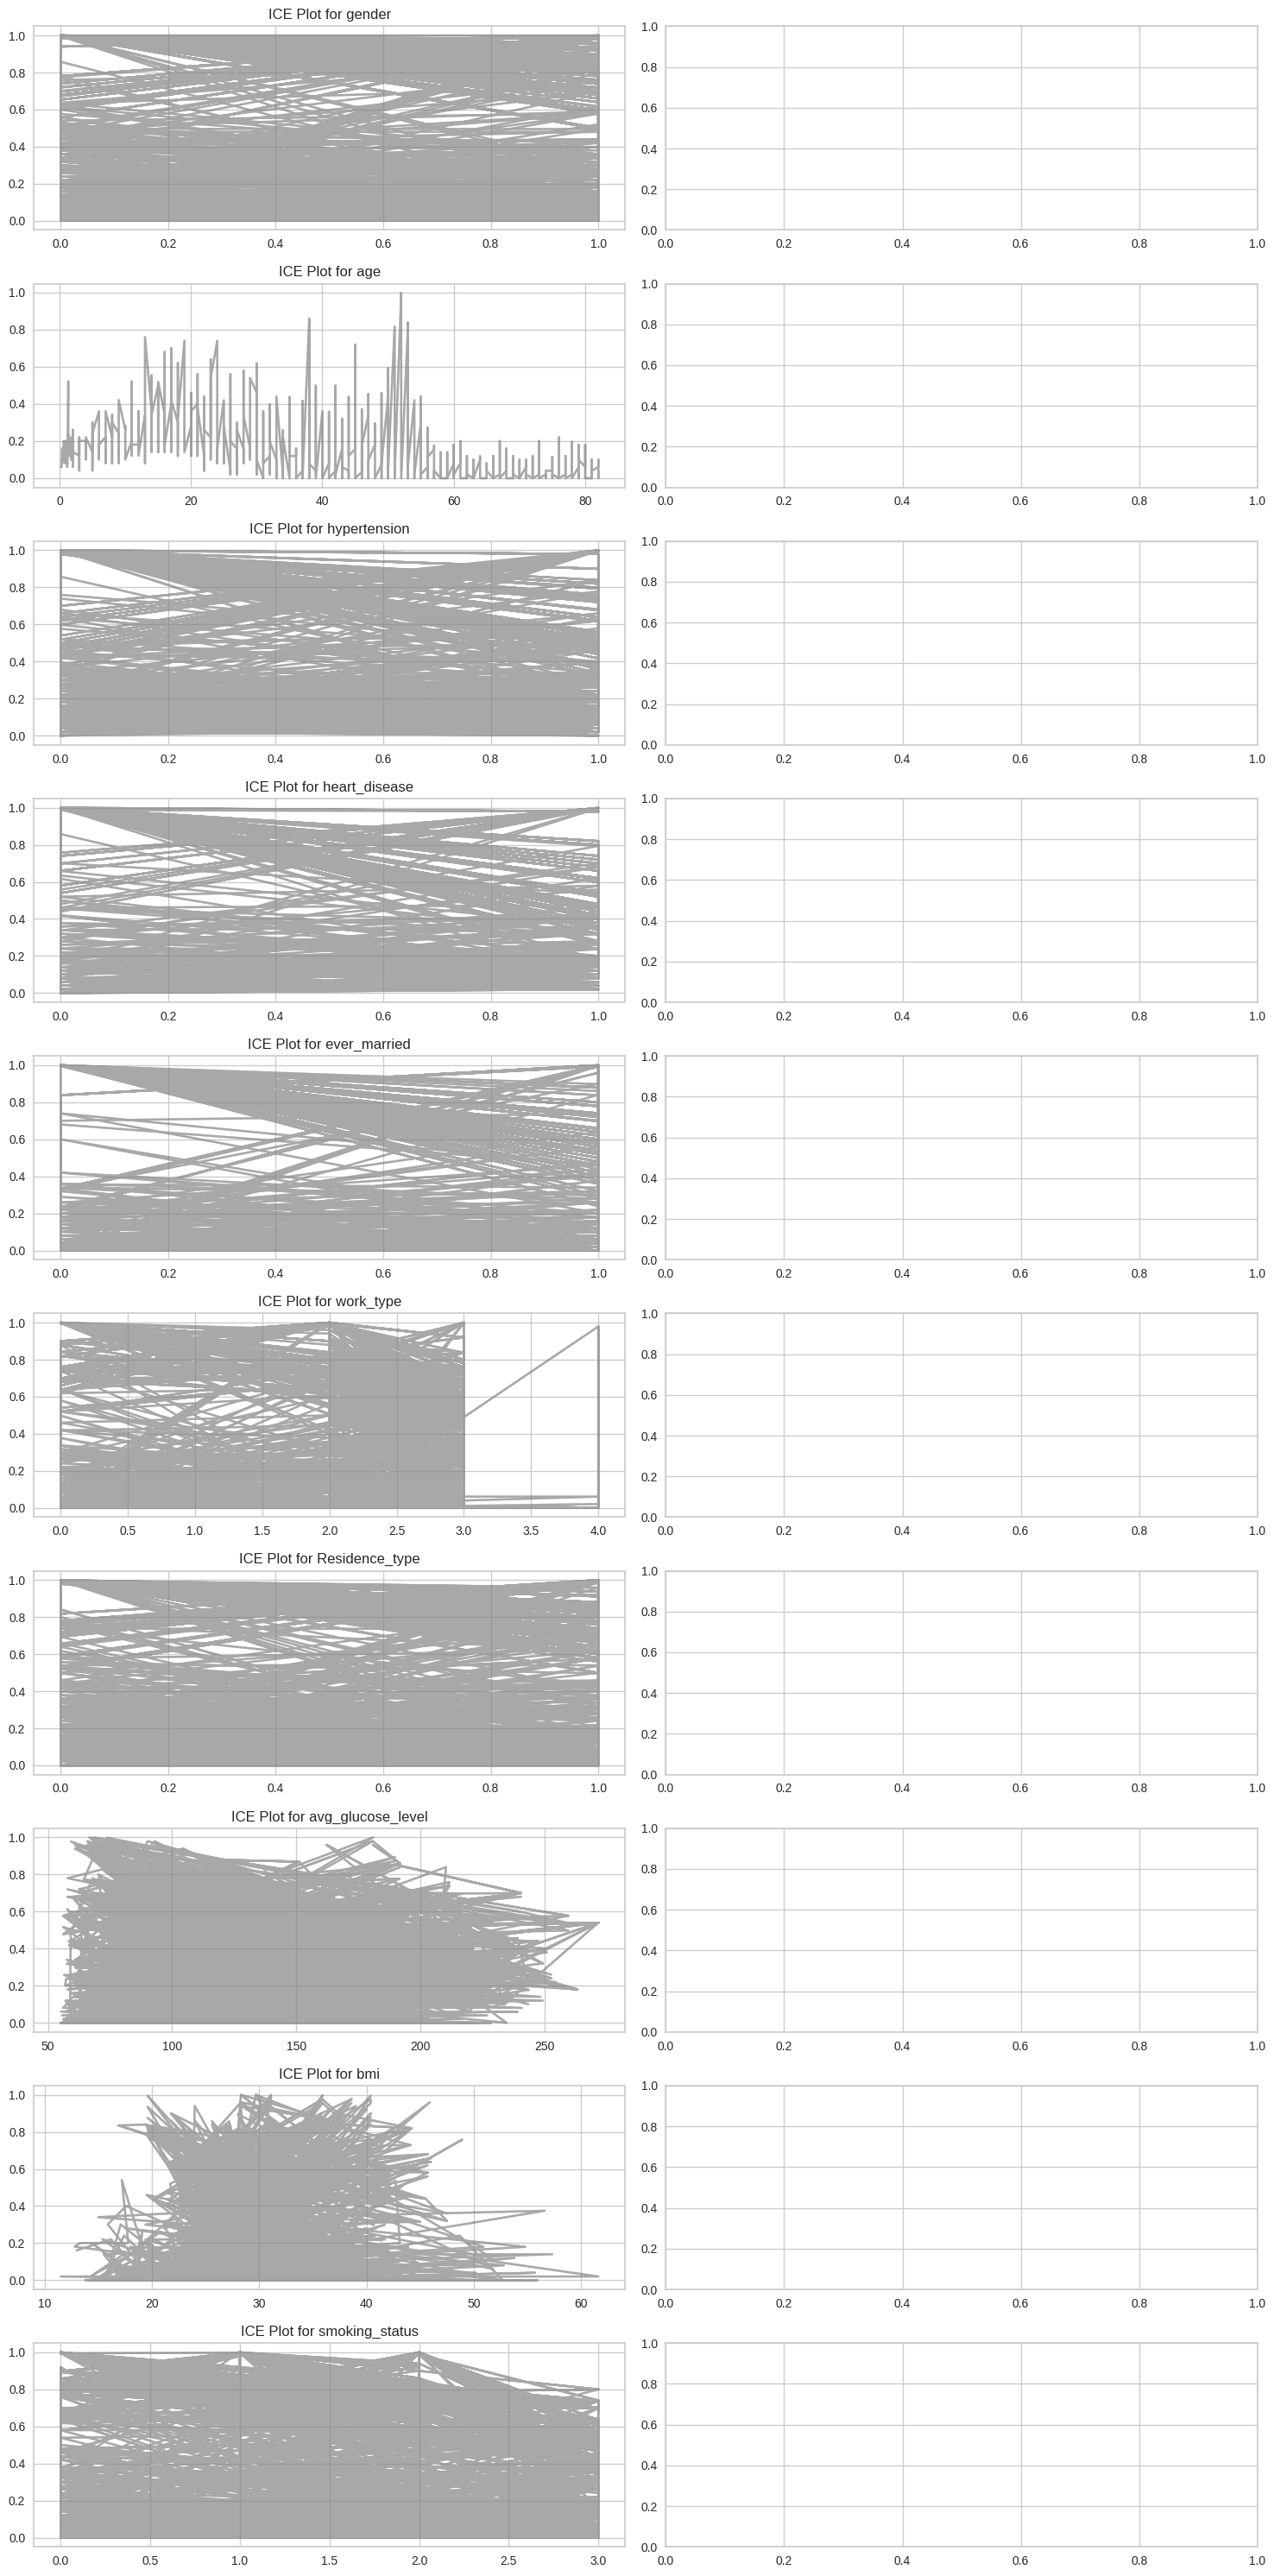

In [ ]:
import h2o
import pandas as pd
from h2o.estimators import H2ORandomForestEstimator
from pdpbox import pdp
import numpy as np
import matplotlib.pyplot as plt


h2o.init()


data = h2o.import_file('https://raw.githubusercontent.com/smithiParthi213/SmithiParthiban_DSE_Assignments/main/clean_dataset.csv')



# Define features and target column names
X = data.columns[:-1]  # Features
y = data.columns[-1]   # Target column

# Split the data into train and test sets
train, test = data.split_frame(ratios=[0.7], seed=1234)

# Train an H2O Random Forest model
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, seed=1234)
model.train(x=X, y=y, training_frame=train)

# Convert test data to Pandas DataFrame
test_pd = test.as_data_frame()

# Set sample size
sample_size = 10

# Create a grid of subplots for ICE and PDP plots
fig, axes = plt.subplots(nrows=len(X), ncols=2, figsize=(15, 3 * len(X)))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(X):
    # Generate ICE curves
    ice_data = []
    for j in range(sample_size):
        sample_data = test_pd.copy()
        sample_data[feature] = np.linspace(test_pd[feature].min(), test_pd[feature].max(), len(test_pd))
        predictions = model.predict(h2o.H2OFrame(sample_data)).as_data_frame().values.flatten()
        ice_data.append(predictions)

    # Plot ICE curves
    axes[i, 0].set_title(f'ICE Plot for {feature}')
    for curve in ice_data:
        axes[i, 0].plot(test_pd[feature], curve, color='gray', alpha=0.1)

    # Add individual predictions
    #axes[i, 0].scatter(test_pd[feature], model.predict(test).as_data_frame().values.flatten(), color='red', label='Individual Predictions', alpha=0.5)
    #axes[i, 0].set_xlabel(feature)
    #axes[i, 0].set_ylabel('Prediction')

    # Generate PDP
    #pdp_data = pdp.pdp_isolate(model=model, dataset=test_pd, model_features=X, feature=feature)
    #pdp.pdp_plot(pdp_data, feature_name=feature, plot_lines=True, ax=axes[i, 1])

# Display the plots
plt.tight_layout()
plt.show()


Since ICE plot can only be implemented on numerical values, the plots for categorical features are blank

We already implemented AutoML and inferred that DRF is the best model.

Inference of ICE results:

* ***age***
* ***avg_glucose_level***
* ***bmi***



***AGE:***

* we can distinctively observe that people between the age of 40 - 60 are most likely to get stroke.

***avg_glucose_level:***

* It is evident from the above plot that people with the higher avg_glucose_level are mostly affected by stroke.

***BMI:***

* It is clear from the plot that people with the bmi range of ***28 - 40*** are mostly affected by Stroke


---
###From the implemented model interpretability methods -  SHAP and ICE:

We can infer that the below features are important commonly in both models:
* ***age***
* ***avg_glucose_level***
* ***bmi***


and SHAP interprets that hypertension is also one of the important features.

---



### **References**

1. Refered Towards Data Science - https://towardsdatascience.com/feature-selection-a-comprehensive-list-of-strategies-3fecdf802b79

2. Sckit learn offcial documentation.


3. Eli5 official documentation - https://eli5.readthedocs.io/en/latest/

4. https://towardsdatascience.com/drf-a-random-forest-for-almost-everything-625fa5c3bcb8

5. https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

6. https://scikit-learn.org/stable/modules/partial_dependence.html




### **LICENSE**

Copyright 2023 Smithi Parthiban

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.